In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
from collections import defaultdict

from functions_transposons_outside_genes import get_genes_names
from functions_transposons_outside_genes import defining_threshold_given_tr_density
from functions_transposons_outside_genes import get_discarded_genes_by_duplication
from functions_transposons_outside_genes import get_amenable_genes_coverage_neighborhood
from functions_transposons_outside_genes import local_discrimination_genes_by_neighbors_coverage

In [2]:
data_all=pd.read_excel('../postprocessed-data/postprocessed_data_all_backgrounds.xlsx',engine="openpyxl")

In [3]:

keys=['dbem3_b',
 'dnrp1_b',
 'bem1-aid_a',
 'dnrp1_a',
 'dbem1dbem3_b',
 'wt_merged',
 'dbem1dbem3_a',
 'bem1-aid-dbem3_a',
 'bem1-aid-dbem3_b',
 'wt_b',
 'wt_a',
 'dnrp1_merged',
 'bem1-aid_b',
 'dbem3_merged',
 'dbem3_a']

In [4]:
from ast import literal_eval
positions_float_pd=pd.read_csv("../postprocessed-data/genetic_positions_float_pd_all_backgrounds.csv",converters={'Positions_float': literal_eval,'Ninsertions': literal_eval})
positions_float_pd.rename(columns={'Unnamed: 0':'Gene name', "Unnamed: 1": "background"},inplace=True)

In [5]:
data_all_modified,genes_names=get_genes_names(data_raw=data_all,keys=keys)

In [8]:

# ## getting genes that are duplicated in the genome 


# discarded_genes_by_duplication=get_discarded_genes_by_duplication(positions_float_pd,genes_names=genes_names)

# np.savetxt("../postprocessed-data/discarded_genes_by_duplication.txt",discarded_genes_by_duplication,fmt="%s")


In [6]:
discarded_genes_by_duplication=np.loadtxt("../postprocessed-data/discarded_genes_by_duplication.txt",dtype=str)

In [53]:
discarded_genes_by_duplication

array(['ECM1', 'MYO4', 'SSA1', 'RPL30', 'RPL19A', 'PRE8', 'PRE7',
       'RPL19B', 'ELP6', 'ETR1', 'RPS11B', 'MMS4', 'SGS1', 'GGC1', 'REI1',
       'MMS1', 'MDL2', 'FZF1', 'ACF2', 'FYV5', 'NCP1', 'PAD1', 'KCC4',
       'PCI8', 'GNA1', 'BUL1', 'SBP1', 'COP1', 'POL3', 'OAC1', 'RPL31A',
       'DYN2', 'HED1', 'ATG31', 'RPS11A', 'BCY1', 'BAP3', 'HEM12', 'CPR2',
       'ASF1', 'CUP1-1', 'KAR2', 'ABF2', 'CDC40', 'RPL12B', 'PSO2',
       'HXT13', 'RPL12A', 'DEF1', 'MOT2', 'ALD2', 'RPS22A', 'RPS21B',
       'ECM32', 'RAD53', 'CDC14', 'RPS21A', 'MPT5', 'GPI13', 'RPL7A',
       'IMO32', 'RPL26B', 'RPL11B', 'RPS23A', 'PRE9', 'TRX1', 'AMA1',
       'AIF1', 'ARN2', 'MAS2', 'IFH1', 'KIC1', 'ARL3', 'RPS4B', 'RPL11A',
       'RPS22B', 'RPL31B', 'PDR5', 'HXT14', 'RPL17B', 'IME2', 'ALY2',
       'RPS4A', 'PRE10', 'RPL17A', 'KDX1', 'MCK1', 'PUB1', 'GAL2', 'SIL1',
       'STM1', 'ELP4', 'RPS23B', 'TAD3', 'MMS22', 'RPL26A', 'ALD3',
       'DSK2', 'RAP1', 'noncoding', 'RCL1', 'VPS5'], dtype='<U9')

In [7]:
## Getting amenable genes for analysis of local neighborhood

# Independent variables 

windows_size=10000
targets,genes_not_discarded_by_location=get_amenable_genes_coverage_neighborhood(positions_float_pd,genes_names=genes_names,discarded_genes_by_duplication=discarded_genes_by_duplication,windows_size=windows_size)


In [ ]:
genes_not_discarded_by_location

array(['COX26', 'CUB1', 'ERG29', 'KCH1', 'MCY1', 'MPO1', 'NVJ2', 'PXP1',
       'PXP2'], dtype=object)

In [ ]:

## example playground one gene
background="wt_merged"
## defining the Threshold for each background
threshold,density=defining_threshold_given_tr_density(data_all_modified,windows_size=windows_size,background=background)
## Discriminating genes by local neighborhood coverage
n=0
k=10
a,b,c,d=local_discrimination_genes_by_neighbors_coverage(positions_float_pd,background=background,gene_of_interest="BEM1",windows_size=windows_size,threshold=k*threshold)


In [ ]:
a,b,c,d,k*threshold,density

([], [], 21322, 194613, 4140.0, 0.04142334392876978)

In [7]:
## Big loop to get the local neighborhood coverage for each background 
background="wt_merged"
k=1 # Amplified factor for the threshold
windows_size=3000 # bp
genes_out=[]
tmp_c=[]
tmp_d=[]
genes_out_by_neighborhood=defaultdict(dict)

threshold,density=defining_threshold_given_tr_density(data_all_modified,windows_size=windows_size,background=background)

targets,genes_not_discarded_by_location=get_amenable_genes_coverage_neighborhood(positions_float_pd,genes_names=genes_names,discarded_genes_by_duplication=discarded_genes_by_duplication,windows_size=windows_size)

for amenable_genes in targets:
    
    a,b,c,d=local_discrimination_genes_by_neighbors_coverage(positions_float_pd,background=background,gene_of_interest=amenable_genes,windows_size=windows_size,threshold=k*threshold)
    if any((a!=[],b!=[])):
        
        tmp_c.append(c)
        tmp_d.append(d)
    if a!=[]:
        genes_out.append(a)
    elif b!=[]:
        genes_out.append(b)


genes_out_by_neighborhood["discarded_genes_neighborhood"][background]=np.unique(genes_out)
genes_out_by_neighborhood["sum upstream insertions"][background]=tmp_c
genes_out_by_neighborhood["sum downstream insertions"][background]=tmp_d
genes_out_by_neighborhood["threshold coverage"][background]=k*threshold    

In [9]:
genes_out_by_neighborhood_pd=pd.DataFrame.from_dict(genes_out_by_neighborhood)

genes_out_by_neighborhood_pd

,discarded_genes_neighborhood,sum upstream insertions,sum downstream insertions,threshold coverage
wt_merged,"[AAD15, ACM1, AEP3, AFT2, AGC1, AIM44, AIM45, ...","[0.0, 15101, 192637, 67894, 207582, 100677, 19...","[13, 16, 58, 44, 0.0, 85, 84, 46, 0.0, 31, 31,...",124.0


In [62]:
print("There are",len(genes_out_by_neighborhood_pd["discarded_genes_neighborhood"][0].tolist()),
"out of",len(targets),
"genes discarded in WT_merged for essentiality scores due to its low coverage in its neighborhood.")

There are 382 out of 4768 genes discarded in WT_merged for essentiality scores due to its low coverage in its neighborhood


In [52]:
genes_out_by_neighborhood_pd.to_excel("../postprocessed-data/genes_out_by_neighborhood.xlsx",index=True)

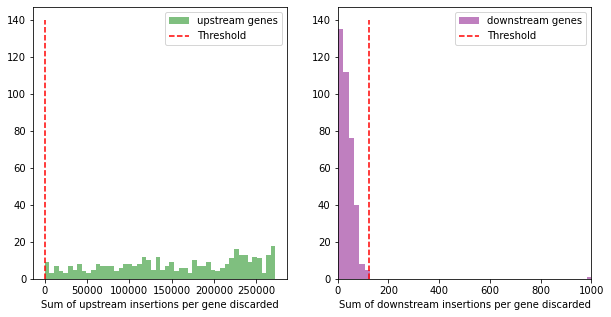

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(genes_out_by_neighborhood_pd.loc["wt_merged","sum upstream insertions"], bins=50, alpha=0.5, label='upstream genes',color="green"),
ax[1].hist(genes_out_by_neighborhood_pd.loc["wt_merged","sum downstream insertions"], bins=400, alpha=0.5, label='downstream genes',color='purple')
# plt.legend(loc='upper right')
ax[1].set_xlim([0,1000])
ax[0].set_xlabel('Sum of upstream insertions per gene discarded')
ax[1].set_xlabel('Sum of downstream insertions per gene discarded')

ax[1].vlines(x=k*threshold, ymin=0, ymax=140, linestyles='dashed', colors='r', label='Threshold')
ax[0].vlines(x=k*threshold, ymin=0, ymax=140, linestyles='dashed', colors='r', label='Threshold')

ax[1].legend(loc='upper right')
ax[0].legend(loc='upper right')

In [50]:
fig.savefig("../figures/fig_histogram_upstream_downstream_insertions_per_gene_discarded_by_neighborhood.png",dpi=300)

In [63]:
keys= ['bem1-aid_a','dbem1dbem3_b','wt_merged','dbem1dbem3_a', 
'dnrp1_merged','bem1-aid_b','dbem3_merged',]

In [64]:
### Run for a night #######DONT RUN THIS AGAIN IT TAKES 5 HOURS!!
# k=1 # Amplified factor for the threshold
# windows_size=3000 #bp
# genes_out_by_neighborhood=defaultdict(dict)

# for background in keys:
#     tmp_a=[]
#     tmp_b=[]
#     tmp_c=[]
#     tmp_d=[]

#     threshold,density=defining_threshold_given_tr_density(data_all_modified,windows_size=windows_size,background=background)
#     targets,genes_not_discarded_by_location=get_amenable_genes_coverage_neighborhood(positions_float_pd,genes_names=genes_names,discarded_genes_by_duplication=discarded_genes_by_duplication,windows_size=windows_size)

#     for amenable_genes in targets:
       
#         a,b,c,d=local_discrimination_genes_by_neighbors_coverage(positions_float_pd,background=background,gene_of_interest=amenable_genes,windows_size=windows_size,threshold=k*threshold)
#         if a!=[]:
#             tmp_a.append(a)

            
#         if b!=[]:
#             tmp_b.append(b)

#         if any((a!=[],b!=[])):

#             tmp_c.append(c)
#             tmp_d.append(d)

#     genes_out_by_neighborhood["discarded_genes_neighborhood"][background]=np.unique([tmp_a,tmp_b])
#     genes_out_by_neighborhood["sum upstream insertions"][background]=tmp_c
#     genes_out_by_neighborhood["sum downstream insertions"][background]=tmp_d
#     genes_out_by_neighborhood["threshold coverage"][background]=k*threshold


/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [65]:
genes_out_by_neighborhood_pd=pd.DataFrame.from_dict(genes_out_by_neighborhood)

genes_out_by_neighborhood_pd

,discarded_genes_neighborhood,sum upstream insertions,sum downstream insertions,threshold coverage
bem1-aid_a,"[[[AAD15], [ACM1], [AEP3], [AFT2], [AGC1], [AI...","[0.0, 3767, 57243, 19823, 61783, 29915, 58458,...","[1, 12, 4, 18, 0.0, 19, 12, 24, 0.0, 11, 24, 0...",30.0
dbem1dbem3_b,"[[[AAD15], [ACM1], [AEP3], [AFT2], [AGC1], [AI...","[0.0, 14659, 175670, 62153, 189106, 92374, 178...","[15, 12, 45, 46, 0.0, 85, 73, 54, 0.0, 30, 26,...",116.0
wt_merged,"[[[AAD15], [ACM1], [AEP3], [AFT2], [AGC1], [AI...","[0.0, 15101, 192637, 67894, 207582, 100677, 19...","[13, 16, 58, 44, 0.0, 85, 84, 46, 0.0, 31, 31,...",124.0
dbem1dbem3_a,"[[[AAD15], [ACM1], [AEP3], [AFT2], [AGC1], [AI...","[0.0, 15327, 188908, 66678, 203423, 98952, 192...","[10, 14, 42, 51, 0.0, 82, 80, 31, 0.0, 28, 39,...",123.0
dnrp1_merged,"[[[AAD15], [ACM1], [AEP3], [AFT2], [AGC1], [AI...","[0.0, 27433, 357787, 125917, 383938, 186440, 3...","[23, 22, 105, 65, 0.0, 126, 178, 88, 0.0, 65, ...",232.0
bem1-aid_b,"[[[AAD15], [ACM1], [AEP3], [AFT2], [AGC1], [AI...","[0.0, 7707, 113343, 39545, 122203, 59470, 1156...","[3, 21, 14, 28, 0.0, 43, 25, 32, 0.0, 19, 48, ...",61.0
dbem3_merged,"[[[AAD15], [ACM1], [AEP3], [AFT2], [AGC1], [AI...","[0.0, 29532, 403221, 140888, 432298, 209882, 4...","[28, 40, 80, 102, 0.0, 160, 146, 95, 0.0, 88, ...",248.0


In [67]:
genes_out_by_neighborhood_pd.to_excel("../postprocessed-data/genes_out_by_neighborhood.xlsx",index=True)

In [77]:

for i in keys:
    print("There are",len(genes_out_by_neighborhood_pd.loc[i,"discarded_genes_neighborhood"].tolist()[0]),
    "out of",len(targets),
    "genes discarded in" ,i, "for essentiality scores due to its low coverage in its neighborhood.")

There are 351 out of 4768 genes discarded in bem1-aid_a for essentiality scores due to its low coverage in its neighborhood.
There are 376 out of 4768 genes discarded in dbem1dbem3_b for essentiality scores due to its low coverage in its neighborhood.
There are 376 out of 4768 genes discarded in wt_merged for essentiality scores due to its low coverage in its neighborhood.
There are 374 out of 4768 genes discarded in dbem1dbem3_a for essentiality scores due to its low coverage in its neighborhood.
There are 372 out of 4768 genes discarded in dnrp1_merged for essentiality scores due to its low coverage in its neighborhood.
There are 357 out of 4768 genes discarded in bem1-aid_b for essentiality scores due to its low coverage in its neighborhood.
There are 376 out of 4768 genes discarded in dbem3_merged for essentiality scores due to its low coverage in its neighborhood.


In [94]:
for j in np.arange(0,len(keys)):
    for i in np.arange(0,len(keys)):
        tmp=np.setdiff1d(genes_out_by_neighborhood_pd.loc[keys[j],"discarded_genes_neighborhood"].tolist()[0],genes_out_by_neighborhood_pd.loc[keys[i],"discarded_genes_neighborhood"].tolist()[0])
        print("these genes:",tmp,"are different between",keys[j],"and",keys[i])

these genes: [] are different between bem1-aid_a and bem1-aid_a
these genes: ['ARR3' 'HAL1'] are different between bem1-aid_a and dbem1dbem3_b
these genes: ['ARR3' 'HAL1'] are different between bem1-aid_a and wt_merged
these genes: ['ARR3' 'HAL1' 'NOP4'] are different between bem1-aid_a and dbem1dbem3_a
these genes: ['ARR3' 'HAL1' 'ICL2' 'LSP1' 'TIM50'] are different between bem1-aid_a and dnrp1_merged
these genes: ['APM1' 'CWC27' 'ERI1' 'MNN9' 'NEW1' 'NOP4' 'SPE3' 'TFB4'] are different between bem1-aid_a and bem1-aid_b
these genes: ['ARR3' 'HAL1'] are different between bem1-aid_a and dbem3_merged
these genes: ['ARR1' 'ATG11' 'BET2' 'CBP3' 'COA2' 'COG4' 'DIM1' 'DPB2' 'ENV7' 'FLC1'
 'GDE1' 'GRS2' 'HFI1' 'ISM1' 'KEL3' 'NUT2' 'PAU22' 'PNG1' 'PRM4' 'PRP4'
 'RBD2' 'RPL1A' 'SRP54' 'TAZ1' 'TEF1' 'UBA3' 'VPS28'] are different between dbem1dbem3_b and bem1-aid_a
these genes: [] are different between dbem1dbem3_b and dbem1dbem3_b
these genes: [] are different between dbem1dbem3_b and wt_merged
t

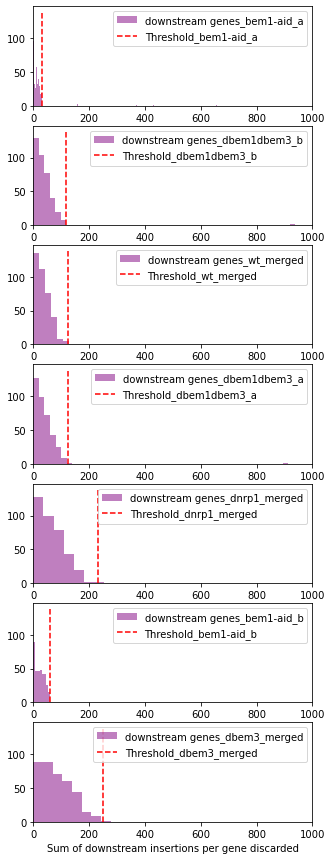

In [101]:
fig, ax = plt.subplots(nrows=len(keys), ncols=1, figsize=(5, 15))
for i in np.arange(0,len(keys)):
    ax[i].hist(genes_out_by_neighborhood_pd.loc[keys[i],"sum downstream insertions"], bins=400, alpha=0.5, label='downstream genes_'+keys[i],color='purple')
    # plt.legend(loc='upper right')
    ax[i].set_xlim([0,1000])
    ax[i].set_xlabel('Sum of downstream insertions per gene discarded')

    ax[i].vlines(x=genes_out_by_neighborhood_pd.loc[keys[i],"threshold coverage"] ,ymin=0, ymax=140, linestyles='dashed', colors='r', label='Threshold_'+ keys[i])

    ax[i].legend(loc='upper right')
fig.savefig("../figures/fig_histogram_downstream_insertions_per_gene_discarded_by_neighborhood_all_keys.png",dpi=300)

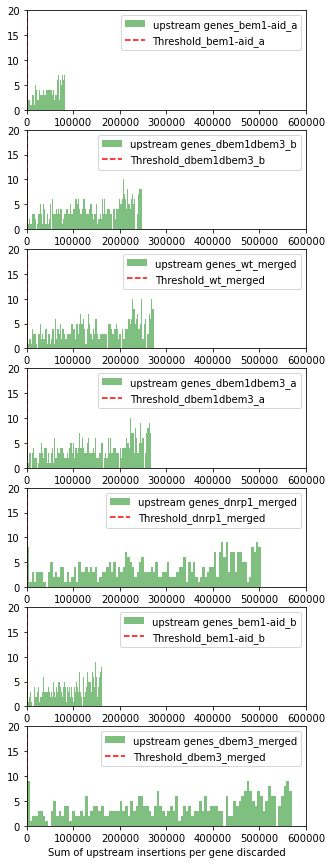

In [109]:
fig, ax = plt.subplots(nrows=len(keys), ncols=1, figsize=(5, 15))
for i in np.arange(0,len(keys)):
    ax[i].hist(genes_out_by_neighborhood_pd.loc[keys[i],"sum upstream insertions"], bins=100, alpha=0.5, label='upstream genes_'+keys[i],color='green')
    # plt.legend(loc='upper right')
    ax[i].set_xlim([0,600000])
    ax[i].set_ylim([0,20])
    ax[i].set_xlabel('Sum of upstream insertions per gene discarded')

    ax[i].vlines(x=genes_out_by_neighborhood_pd.loc[keys[i],"threshold coverage"] ,ymin=0, ymax=140, linestyles='dashed', colors='r', label='Threshold_'+ keys[i])

    ax[i].legend(loc='upper right')
fig.savefig("../figures/fig_histogram_upstream_insertions_per_gene_discarded_by_neighborhood_all_keys.png",dpi=300)